### 1번 문제

In [240]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [241]:
df = pd.read_csv('subwaytime.csv', encoding='utf-8-sig',header=[0,1])

In [242]:
df.columns

MultiIndex([(                '사용월', 'Unnamed: 0_level_1'),
            (                '호선명', 'Unnamed: 1_level_1'),
            (                '역ID', 'Unnamed: 2_level_1'),
            (               '지하철역', 'Unnamed: 3_level_1'),
            (  '04:00:00~04:59:59',                 '승차'),
            ( 'Unnamed: 5_level_0',                 '하차'),
            (  '05:00:00~05:59:59',                 '승차'),
            ( 'Unnamed: 7_level_0',                 '하차'),
            (  '06:00:00~06:59:59',                 '승차'),
            ( 'Unnamed: 9_level_0',                 '하차'),
            (  '07:00:00~07:59:59',                 '승차'),
            ('Unnamed: 11_level_0',                 '하차'),
            (  '08:00:00~08:59:59',                 '승차'),
            ('Unnamed: 13_level_0',                 '하차'),
            (  '09:00:00~09:59:59',                 '승차'),
            ('Unnamed: 15_level_0',                 '하차'),
            (  '10:00:00~10:59:59',                 '승차'

In [243]:
df.head(3)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5_level_0,05:00:00~05:59:59,Unnamed: 7_level_0,06:00:00~06:59:59,Unnamed: 9_level_0,...,23:00:00~23:59:59,Unnamed: 43_level_0,00:00:00~00:59:59,Unnamed: 45_level_0,01:00:00~01:59:59,Unnamed: 47_level_0,02:00:00~02:59:59,Unnamed: 49_level_0,03:00:00~03:59:59,Unnamed: 51_level_0
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
0,Dec.22,1호선,150,서울역,604,24,8028,7918,12137,44148,...,26461,15356,2776,3500,43,707,1,46,0,0
1,Dec.22,1호선,151,시청,127,1,2197,4277,3713,21598,...,13533,4727,1934,1126,102,110,2,7,0,0
2,Dec.22,1호선,152,종각,134,4,3869,4625,4670,21956,...,36262,4615,1575,1058,434,81,0,2,0,0


In [244]:
time_exit_df=df.iloc[:,[1,3,11,13]]
time_exit_df.columns=['호선','역이름','7','8']
time_exit_df

,호선,역이름,7,8
0,1호선,서울역,100206,212880
1,1호선,시청,61522,191043
2,1호선,종각,95122,243983
3,1호선,종로3가,23591,68025
4,1호선,종로5가,39185,98661
...,...,...,...,...
608,신림선,당곡,3038,7774
609,신림선,신림,1109,2426
610,신림선,서원,1114,1817
611,신림선,서울대벤처타운,4685,7628


In [245]:
time_exit_df['합계'] = time_exit_df.sum(axis=1, numeric_only=True)
last_df=time_exit_df.drop(columns=['7', '8'])
last_df

C:\Users\y2kjd\AppData\Local\Temp\ipykernel_20732\738095554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_exit_df['합계'] = time_exit_df.sum(axis=1, numeric_only=True)


,호선,역이름,합계
0,1호선,서울역,313086
1,1호선,시청,252565
2,1호선,종각,339105
3,1호선,종로3가,91616
4,1호선,종로5가,137846
...,...,...,...
608,신림선,당곡,10812
609,신림선,신림,3535
610,신림선,서원,2931
611,신림선,서울대벤처타운,12313


In [246]:
last2=last_df.groupby(['호선']).max('합계').iloc[0:7]

In [247]:
real_last = pd.merge(left = last_df , right = last2, how = "inner", on = "합계")

In [248]:
real_last

,호선,역이름,합계
0,1호선,종각,339105
1,2호선,역삼,483060
2,3호선,양재(서초구청),330157
3,4호선,충무로,222455
4,5호선,여의도,364745
5,6호선,공덕,138537
6,7호선,가산디지털단지,495522


Windows	OS
출근 시간대 1호선 최대 하차역: 종각역, 하차인원: 339105명
출근 시간대 2호선 최대 하차역: 역삼역, 하차인원: 483060명
출근 시간대 3호선 최대 하차역: 양재(서초구청)역, 하차인원: 330157명
출근 시간대 4호선 최대 하차역: 충무로역, 하차인원: 222455명
출근 시간대 5호선 최대 하차역: 여의도역, 하차인원: 364745명
출근 시간대 6호선 최대 하차역: 공덕역, 하차인원: 138537명
출근 시간대 7호선 최대 하차역: 가산디지털단지역, 하차인원: 495522명


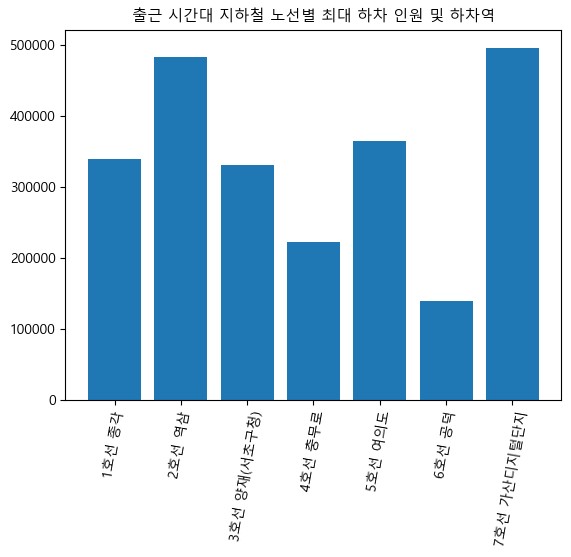

In [249]:
import	platform
import	matplotlib.pyplot as	plt
import	matplotlib.font_manager as	fm

system_name =	platform.system()
if	system_name ==	'Windows':
    #	Windows	운영체제
    print('Windows	OS')
    plt.rc('font',	family='Malgun Gothic')
elif system_name ==	'Darwin':				#	Mac	OS
    print('Mac	OS')
    plt.rc('font',	family='AppleGothic')
elif system_name ==	'Linux':				#	Linux
    print('Linux	OS')
    path	=	'/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name =	fm.FontProperties(fname=path,	size=12)
    plt.rc('font',	family=font_name)
else:
    print("Not	support")

print(f'출근 시간대 {real_last.iloc[0][0]} 최대 하차역: {real_last.iloc[0][1]}역, 하차인원: {real_last.iloc[0][2]}명')
print(f'출근 시간대 {real_last.iloc[1][0]} 최대 하차역: {real_last.iloc[1][1]}역, 하차인원: {real_last.iloc[1][2]}명')
print(f'출근 시간대 {real_last.iloc[2][0]} 최대 하차역: {real_last.iloc[2][1]}역, 하차인원: {real_last.iloc[2][2]}명')
print(f'출근 시간대 {real_last.iloc[3][0]} 최대 하차역: {real_last.iloc[3][1]}역, 하차인원: {real_last.iloc[3][2]}명')
print(f'출근 시간대 {real_last.iloc[4][0]} 최대 하차역: {real_last.iloc[4][1]}역, 하차인원: {real_last.iloc[4][2]}명')
print(f'출근 시간대 {real_last.iloc[5][0]} 최대 하차역: {real_last.iloc[5][1]}역, 하차인원: {real_last.iloc[5][2]}명')
print(f'출근 시간대 {real_last.iloc[6][0]} 최대 하차역: {real_last.iloc[6][1]}역, 하차인원: {real_last.iloc[6][2]}명')

plt.figure(dpi=100)
plt.bar(real_last['역이름'],real_last['합계'])
plt.title(f'출근 시간대 지하철 노선별 최대 하차 인원 및 하차역',size=11)
plt.xticks(range(7), real_last['호선'] +' '+ real_last['역이름'], rotation=80)
plt.show()

In [250]:
print(f'출근 시간대 {real_last.iloc[0][0]} 최대 하차역: {real_last.iloc[0][1]}역, 하차인원: {real_last.iloc[0][2]}명')
print(f'출근 시간대 {real_last.iloc[1][0]} 최대 하차역: {real_last.iloc[1][1]}역, 하차인원: {real_last.iloc[1][2]}명')
print(f'출근 시간대 {real_last.iloc[2][0]} 최대 하차역: {real_last.iloc[2][1]}역, 하차인원: {real_last.iloc[2][2]}명')
print(f'출근 시간대 {real_last.iloc[3][0]} 최대 하차역: {real_last.iloc[3][1]}역, 하차인원: {real_last.iloc[3][2]}명')
print(f'출근 시간대 {real_last.iloc[4][0]} 최대 하차역: {real_last.iloc[4][1]}역, 하차인원: {real_last.iloc[4][2]}명')
print(f'출근 시간대 {real_last.iloc[5][0]} 최대 하차역: {real_last.iloc[5][1]}역, 하차인원: {real_last.iloc[5][2]}명')
print(f'출근 시간대 {real_last.iloc[6][0]} 최대 하차역: {real_last.iloc[6][1]}역, 하차인원: {real_last.iloc[6][2]}명')

출근 시간대 1호선 최대 하차역: 종각역, 하차인원: 339105명
출근 시간대 2호선 최대 하차역: 역삼역, 하차인원: 483060명
출근 시간대 3호선 최대 하차역: 양재(서초구청)역, 하차인원: 330157명
출근 시간대 4호선 최대 하차역: 충무로역, 하차인원: 222455명
출근 시간대 5호선 최대 하차역: 여의도역, 하차인원: 364745명
출근 시간대 6호선 최대 하차역: 공덕역, 하차인원: 138537명
출근 시간대 7호선 최대 하차역: 가산디지털단지역, 하차인원: 495522명


### 2번문제

In [251]:
exit_df=df.iloc[:,[1,3,11,13]]
exit_df.columns=['호선','역이름','7','8']
exit_df

,호선,역이름,7,8
0,1호선,서울역,100206,212880
1,1호선,시청,61522,191043
2,1호선,종각,95122,243983
3,1호선,종로3가,23591,68025
4,1호선,종로5가,39185,98661
...,...,...,...,...
608,신림선,당곡,3038,7774
609,신림선,신림,1109,2426
610,신림선,서원,1114,1817
611,신림선,서울대벤처타운,4685,7628


In [252]:
exit_df['합계'] = exit_df.sum(axis=1, numeric_only=True)
new_df=exit_df.drop(columns=['7', '8'])
new_df

C:\Users\y2kjd\AppData\Local\Temp\ipykernel_20732\578437332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_df['합계'] = exit_df.sum(axis=1, numeric_only=True)


,호선,역이름,합계
0,1호선,서울역,313086
1,1호선,시청,252565
2,1호선,종각,339105
3,1호선,종로3가,91616
4,1호선,종로5가,137846
...,...,...,...
608,신림선,당곡,10812
609,신림선,신림,3535
610,신림선,서원,2931
611,신림선,서울대벤처타운,12313


In [253]:
station = new_df.groupby('역이름', as_index = False).sum()
station = station.sort_values('합계', ascending = False).iloc[:5].reset_index(drop=True)
station

,역이름,합계
0,가산디지털단지,696232
1,여의도,674239
2,선릉,576574
3,서울역,551188
4,시청,531382


In [254]:
station.iloc[0][1]

696232

In [255]:
station.iloc[0][0]

'가산디지털단지'

In [257]:
print(f'{station.iloc[0][0]}: {station.iloc[0][1]} 명')
print(f'{station.iloc[1][0]}: {station.iloc[1][1]} 명')
print(f'{station.iloc[2][0]}: {station.iloc[2][1]} 명')
print(f'{station.iloc[3][0]}: {station.iloc[3][1]} 명')
print(f'{station.iloc[4][0]}: {station.iloc[4][1]} 명')

가산디지털단지:696232 명
여의도:674239 명
선릉:576574 명
서울역:551188 명
시청:531382 명


Windows	OS
가산디지털단지: 696232 명
여의도: 674239 명
선릉: 576574 명
서울역: 551188 명
시청: 531382 명


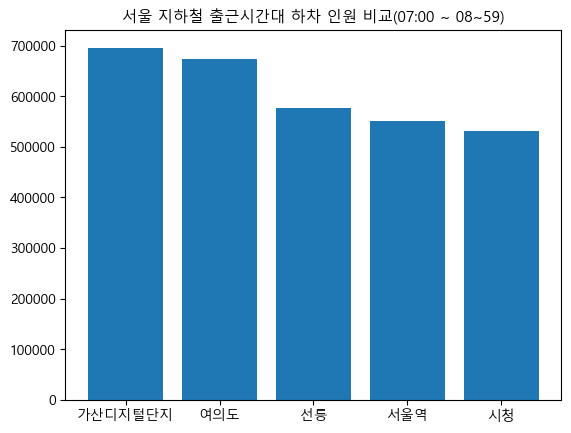

In [258]:
import	platform
import	matplotlib.pyplot as	plt
import	matplotlib.font_manager as	fm

system_name =	platform.system()
if	system_name ==	'Windows':
    #	Windows	운영체제
    print('Windows	OS')
    plt.rc('font',	family='Malgun Gothic')
elif system_name ==	'Darwin':				#	Mac	OS
    print('Mac	OS')
    plt.rc('font',	family='AppleGothic')
elif system_name ==	'Linux':				#	Linux
    print('Linux	OS')
    path	=	'/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name =	fm.FontProperties(fname=path,	size=12)
    plt.rc('font',	family=font_name)
else:
    print("Not	support")

print(f'{station.iloc[0][0]}: {station.iloc[0][1]} 명')
print(f'{station.iloc[1][0]}: {station.iloc[1][1]} 명')
print(f'{station.iloc[2][0]}: {station.iloc[2][1]} 명')
print(f'{station.iloc[3][0]}: {station.iloc[3][1]} 명')
print(f'{station.iloc[4][0]}: {station.iloc[4][1]} 명')

plt.figure(dpi=100)
plt.bar(station['역이름'],station['합계'])
plt.title(f'서울 지하철 출근시간대 하차 인원 비교(07:00 ~ 08~59)',size=11)
plt.xticks(range(5), station['역이름'])
plt.show()